Import Libraries

In [31]:
import csv
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

Functions

In [32]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

# THIS IS A FUNCITON YOU CAN CALL FROM OTHER PLACES TO GET THE DATA 
def CSV_Read_Lidar_data(data_path):
    rows = []
    with open(data_path, 'r') as file:
        csvreader = csv.reader(file)
        header = next(csvreader)
        for row in csvreader:
            rows.append(row)
    return header, rows

Read the CSV File

In [33]:
rows = []
file_path = 'Data/'
file_name = 'HallwayNewMovepoint1meter'
with open(file_path+file_name + '.csv', 'r') as file:
    csvreader = csv.reader(file)
    header = next(csvreader)
    for row in csvreader:
        rows.append(row)
print("test")

headers = np.array(header).T


test


Create pd Series and DataFrames

In [34]:
# Create a Series for the header
header_names = ['angle_min', 'angle_max', 'angle_increment', 'time_increment', 'scan_time', 'range_min', 'range_max']
Header_info = pd.DataFrame(headers, header_names).astype(float)
Header_info

,0
angle_min,-3.124139
angle_max,3.141593
angle_increment,0.005807
time_increment,0.000125
scan_time,0.134745
range_min,0.150000
range_max,12.000000


In [35]:
# create a lidar rho dataframe
translation_df = pd.DataFrame(np.array(rows[1::5]))
translation_df = translation_df.T.astype(float)
abs(translation_df.iloc[0])

0     0.022026
1     0.022026
2     0.022026
3     0.022026
4     0.022026
5     0.022026
6     0.022026
7     0.022026
8     0.022026
9     0.022026
10    0.022026
Name: 0, dtype: float64

In [36]:
# create a lidar rho dataframe
rho_df = pd.DataFrame(np.array(rows[3::5]))
rho_df = rho_df.T
rho_df

,0,1,2,3,4,5,6,7,8,9,10
0,1.371999979019165,1.371999979019165,1.371999979019165,1.371999979019165,1.371999979019165,1.3680000305175781,1.3700000047683716,1.3680000305175781,1.3680000305175781,1.3700000047683716,1.3680000305175781
1,1.371999979019165,1.371999979019165,1.371999979019165,1.371999979019165,1.371999979019165,1.3700000047683716,1.3700000047683716,1.3680000305175781,1.3680000305175781,1.3680000305175781,1.3680000305175781
2,1.371999979019165,1.371999979019165,1.371999979019165,1.371999979019165,1.3700000047683716,1.3700000047683716,1.3700000047683716,1.3700000047683716,1.3680000305175781,1.3680000305175781,1.3680000305175781
3,1.3739999532699585,1.371999979019165,1.371999979019165,1.371999979019165,1.3700000047683716,1.3700000047683716,1.3700000047683716,1.3680000305175781,1.3680000305175781,1.3680000305175781,1.3680000305175781
4,1.3739999532699585,1.3739999532699585,1.3739999532699585,1.371999979019165,1.371999979019165,1.3700000047683716,1.3700000047683716,1.3700000047683716,1.3680000305175781,1.3680000305175781,1.3660000562667847
...,...,...,...,...,...,...,...,...,...,...,...
1075,1.371999979019165,1.371999979019165,1.371999979019165,1.371999979019165,1.371999979019165,1.3700000047683716,1.3700000047683716,1.3680000305175781,1.3680000305175781,1.3700000047683716,1.3680000305175781
1076,1.371999979019165,1.371999979019165,1.371999979019165,1.371999979019165,1.3700000047683716,1.3700000047683716,1.3700000047683716,1.3700000047683716,1.3680000305175781,1.3680000305175781,1.3680000305175781
1077,1.371999979019165,1.371999979019165,1.371999979019165,1.3739999532699585,1.3700000047683716,1.3700000047683716,1.3700000047683716,1.3700000047683716,1.3680000305175781,1.3680000305175781,1.3680000305175781
1078,1.371999979019165,1.371999979019165,1.371999979019165,1.371999979019165,1.371999979019165,1.3700000047683716,1.3700000047683716,1.3700000047683716,1.3680000305175781,1.3680000305175781,1.3660000562667847


In [37]:
def flatten_extend(matrix):
    flat_list = []
    for row in matrix:
        flat_list.extend(row)
    return flat_list

index_tb_poles = []
for i in range(0, rho_df.shape[1]):
    del_indexes = np.array(list(rho_df[i][rho_df[i].astype(float) <= 0.3].index))
    del_indexes = del_indexes + (1080 * i)
    index_tb_poles.append(del_indexes)
# for i in range(num_rows):
#     index_tb_poles.append(del_indexes + (1080 * i))
tb_pole_indexes = flatten_extend(index_tb_poles)
np.array(tb_pole_indexes)

array([], dtype=float64)

In [38]:
# rho_df = rho_df.transpose().drop(del_indexes, axis=1).transpose()

In [39]:
# create a dataframe of the radian alphas
alpha_df = pd.DataFrame()

for i in range(rho_df.shape[1]):
    alpha_df[i] = Header_info.loc['angle_increment'][0] * np.arange(1, 1081)
    # alpha_df[i] = Header_info.loc['angle_increment'][0] * np.arange(1, 1081) - math.pi/2
alpha_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807
1,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614
2,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421
3,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228
4,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035
...,...,...,...,...,...,...,...,...,...,...,...
1075,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311
1076,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118
1077,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925
1078,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732


In [40]:
# Get the x and y coodinates of the dataframe (in a new dataframe)
cartesian_df = pd.DataFrame()
dist_between_scans = 0.1 # distance between each lidar scan
index = 0
for i in range(rho_df.shape[1]):
    x, y = pol2cart(rho_df[i].astype(float), alpha_df[i].astype(float))
    y += dist_between_scans * i # corrects the offset between 
    cartesian_df[index] = x
    index += 1 # this is just to make the index numbers up
    cartesian_df[index] = y
    index += 1
cartesian_df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.371977,0.007967,1.371977,0.107967,1.371977,0.207967,1.371977,0.307967,1.371977,0.407967,...,1.369977,0.607956,1.367977,0.707944,1.367977,0.807944,1.369977,0.907956,1.367977,1.007944
1,1.371907,0.015934,1.371907,0.115934,1.371907,0.215934,1.371907,0.315934,1.371907,0.415934,...,1.369908,0.615911,1.367908,0.715888,1.367908,0.815888,1.367908,0.915888,1.367908,1.015888
2,1.371792,0.023900,1.371792,0.123900,1.371792,0.223900,1.371792,0.323900,1.369792,0.423865,...,1.369792,0.623865,1.369792,0.723865,1.367792,0.823831,1.367792,0.923831,1.367792,1.023831
3,1.373629,0.031912,1.371630,0.131866,1.371630,0.231866,1.371630,0.331866,1.369630,0.431819,...,1.369630,0.631819,1.367631,0.731773,1.367631,0.831773,1.367631,0.931773,1.367631,1.031773
4,1.373421,0.039888,1.373421,0.139888,1.373421,0.239888,1.371422,0.339830,1.371422,0.439830,...,1.369423,0.639772,1.369423,0.739772,1.367423,0.839714,1.367423,0.939714,1.365424,1.039656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,1.371166,-0.047838,1.371166,0.052162,1.371166,0.152162,1.371166,0.252162,1.371166,0.352162,...,1.369167,0.552231,1.367168,0.652301,1.367168,0.752301,1.369167,0.852231,1.367168,0.952301
1076,1.371420,-0.039875,1.371420,0.060125,1.371420,0.160125,1.371420,0.260125,1.369421,0.360183,...,1.369421,0.560183,1.369421,0.660183,1.367422,0.760241,1.367422,0.860241,1.367422,0.960241
1077,1.371629,-0.031911,1.371629,0.068089,1.371629,0.168089,1.373628,0.268043,1.369629,0.368136,...,1.369629,0.568136,1.369629,0.668136,1.367630,0.768182,1.367630,0.868182,1.367630,0.968182
1078,1.371791,-0.023945,1.371791,0.076055,1.371791,0.176055,1.371791,0.276055,1.371791,0.376055,...,1.369791,0.576090,1.369791,0.676090,1.367792,0.776125,1.367792,0.876125,1.365792,0.976159


In [41]:
# Combine in to 1 value
all_cart_datax = pd.DataFrame()
all_cart_datay = pd.DataFrame()

for i in range(int(len(cartesian_df.columns)/2)):
    # combine all x values
    all_cart_datax = pd.concat([all_cart_datax, cartesian_df[i*2]])
    all_cart_datax = all_cart_datax.reset_index()[0]

for i in range(1, int(len(cartesian_df.columns)), 2):   
    # combine all y values
    all_cart_datay = pd.concat([all_cart_datay, cartesian_df[i]])
    all_cart_datay = all_cart_datay.reset_index()[0]

all_cart_data = pd.DataFrame([all_cart_datax, all_cart_datay], ['X', 'Y'])
all_cart_data

,0,1,2,3,4,5,6,7,8,9,...,11870,11871,11872,11873,11874,11875,11876,11877,11878,11879
X,1.371977,1.371907,1.371792,1.373629,1.373421,1.373166,1.372865,1.372518,1.372124,1.371684,...,1.367203,1.367688,1.368127,1.368520,1.368866,1.367168,1.367422,1.367630,1.365792,1.365907
Y,0.007967,0.015934,0.023900,0.031912,0.039888,0.047863,0.055836,0.063807,0.071776,0.079743,...,0.912504,0.920444,0.928388,0.936334,0.944282,0.952301,0.960241,0.968182,0.976159,0.984091


In [42]:
# Now convert that back to alpha and rho
alpha_rho_df = pd.DataFrame(cart2pol(all_cart_data.loc['X'], all_cart_data.loc['Y']), ['Rho', 'Alpha'])
alpha_rho_df

,0,1,2,3,4,5,6,7,8,9,...,11870,11871,11872,11873,11874,11875,11876,11877,11878,11879
Rho,1.372000,1.372000,1.372000,1.374000,1.374000,1.374000,1.374000,1.374000,1.374000,1.37400,...,1.643748,1.648572,1.653383,1.658182,1.662968,1.666141,1.670900,1.675646,1.678772,1.68349
Alpha,0.005807,0.011614,0.017421,0.023228,0.029035,0.034842,0.040649,0.046456,0.052263,0.05807,...,0.588526,0.592369,0.596207,0.600039,0.603866,0.608407,0.612219,0.616026,0.620537,0.62433


In [43]:
#Finally combine the xy data and alpha rho data
all_data_df = pd.concat([alpha_rho_df, all_cart_data])
all_data_df = all_data_df.drop(tb_pole_indexes, axis=1)
# all_data_df = all_data_df.T.iloc[::6, :].T
all_data_df

,0,1,2,3,4,5,6,7,8,9,...,11870,11871,11872,11873,11874,11875,11876,11877,11878,11879
Rho,1.372000,1.372000,1.372000,1.374000,1.374000,1.374000,1.374000,1.374000,1.374000,1.374000,...,1.643748,1.648572,1.653383,1.658182,1.662968,1.666141,1.670900,1.675646,1.678772,1.683490
Alpha,0.005807,0.011614,0.017421,0.023228,0.029035,0.034842,0.040649,0.046456,0.052263,0.058070,...,0.588526,0.592369,0.596207,0.600039,0.603866,0.608407,0.612219,0.616026,0.620537,0.624330
X,1.371977,1.371907,1.371792,1.373629,1.373421,1.373166,1.372865,1.372518,1.372124,1.371684,...,1.367203,1.367688,1.368127,1.368520,1.368866,1.367168,1.367422,1.367630,1.365792,1.365907
Y,0.007967,0.015934,0.023900,0.031912,0.039888,0.047863,0.055836,0.063807,0.071776,0.079743,...,0.912504,0.920444,0.928388,0.936334,0.944282,0.952301,0.960241,0.968182,0.976159,0.984091


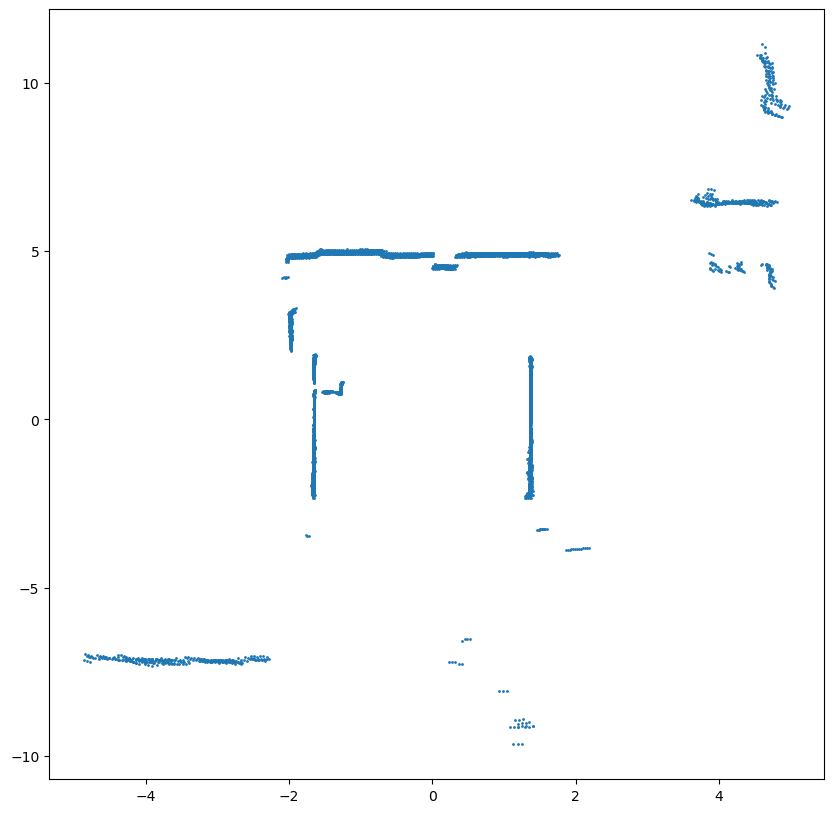

In [44]:
plt.figure(figsize=(10, 10))
plt.scatter(all_data_df.loc['X'], all_data_df.loc['Y'], s=1)
plt.show()


In [45]:
# write to csv
addition = '_GT'
with open(file_path + file_name + addition + '.csv', 'w', newline='') as file:
  writer = csv.writer(file)

  writer.writerow(all_data_df.loc['Rho'])
  writer.writerow(all_data_df.loc['Alpha'])
  writer.writerow(all_data_df.loc['X'])
  writer.writerow(all_data_df.loc['Y'])